In [66]:
#standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [45]:
#actual dataset is quite large, so first looking at filters first
#a glance at all these they can be imported as categories to save memory
indicators = pd.read_csv('ZILLOW_INDICATORS.csv')
regions = pd.read_csv('ZILLOW_REGIONS.csv')
print(indicators.head(),indicators.info())
print(regions.head(),regions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   indicator_id  56 non-null     object
 1   indicator     56 non-null     object
 2   category      56 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB
  indicator_id                                          indicator  \
0         SAAW  Median Sale Price (Smooth & Seasonally Adjuste...   
1         SRAM        Median Sale Price (Raw, All Homes, Monthly)   
2         NSAM  Median Days to Pending (Smooth, All Homes, Mon...   
3         RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...   
4         RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...   

              category  
0  Inventory and sales  
1  Inventory and sales  
2  Inventory and sales  
3              Rentals  
4              Rentals   None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89305 entries, 0 to 89304
Da

In [46]:
#based on info, we can set indexes with id columns and change types to categories for others
indicators = indicators.astype({'indicator_id': 'string', 'indicator': 'category', 'category': 'category'})
regions = regions.astype({'region_type': 'category', 'region': 'category'})
indicators.set_index('indicator_id')
regions.set_index('region_id')
print(indicators)
print(regions)

   indicator_id                                          indicator  \
0          SAAW  Median Sale Price (Smooth & Seasonally Adjuste...   
1          SRAM        Median Sale Price (Raw, All Homes, Monthly)   
2          NSAM  Median Days to Pending (Smooth, All Homes, Mon...   
3          RSNA  ZORI (Smoothed): All Homes Plus Multifamily Ti...   
4          RSSA  ZORI (Smoothed, Seasonally Adjusted): All Home...   
5          ZATT           ZHVI All Homes- Top Tier Time Series ($)   
6          ZSFH           ZHVI Single-Family Homes Time Series ($)   
7          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
8          ZCON                   ZHVI Condo/Co-op Time Series ($)   
9          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
10         Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
11         Z2BR                     ZHVI 2-Bedroom Time Series ($)   
12         Z3BR                     ZHVI 3-Bedroom Time Series ($)   
13         Z1BR     

In [49]:
#based  on the indicators, we'll start with pulling data just for the 'home values' category
home_values_indicators = indicators[indicators['category'] == 'Home values'].copy()
home_values_indicators.drop(columns='category', inplace=True)
print(home_values_indicators)

   indicator_id                                          indicator
5          ZATT           ZHVI All Homes- Top Tier Time Series ($)
6          ZSFH           ZHVI Single-Family Homes Time Series ($)
7          ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)
8          ZCON                   ZHVI Condo/Co-op Time Series ($)
9          ZABT        ZHVI All Homes- Bottom Tier Time Series ($)
10         Z5BR                    ZHVI 5+ Bedroom Time Series ($)
11         Z2BR                     ZHVI 2-Bedroom Time Series ($)
12         Z3BR                     ZHVI 3-Bedroom Time Series ($)
13         Z1BR                     ZHVI 1-Bedroom Time Series ($)
14         Z4BR                     ZHVI 4-Bedroom Time Series ($)


In [54]:
#the zillow_data csv is quite large, so we'll bring in a sample subset 
df = pd.read_csv('ZILLOW_DATA.csv',nrows=500)
print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   indicator_id  500 non-null    object 
 1   region_id     500 non-null    int64  
 2   date          500 non-null    object 
 3   value         500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB
  indicator_id  region_id        date     value
0         ZATT       3101  1998-01-31  338849.0
1         ZATT       3101  1998-02-28  342993.0
2         ZATT       3101  1998-03-31  346763.0
3         ZATT       3101  1998-04-30  349356.0
4         ZATT       3101  1998-05-31  351981.0 None


In [57]:
#from this sample subset we can change some subtypes and parse by date when reading a bigger portion of the csv in
#we will also only want to read in the home value category, which we will need a function for
home_values = pd.read_csv('ZILLOW_DATA.csv',dtype={'indicator_id':'string'},skiprows= lambda x: x in home_values_indicators['indicator_id'],parse_dates=['date'])
print(home_values.head(),home_values.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159415311 entries, 0 to 159415310
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   indicator_id  string        
 1   region_id     int64         
 2   date          datetime64[ns]
 3   value         float64       
dtypes: datetime64[ns](1), float64(1), int64(1), string(1)
memory usage: 4.8 GB
  indicator_id  region_id       date     value
0         ZATT       3101 1998-01-31  338849.0
1         ZATT       3101 1998-02-28  342993.0
2         ZATT       3101 1998-03-31  346763.0
3         ZATT       3101 1998-04-30  349356.0
4         ZATT       3101 1999-03-31  378840.0 None


In [ ]:
#lets get yearly mean/median data. with some larger values within the dataset, median may be more accurate, so we will look at both
home_values['year'] = home_values['date'].dt.year
summary_yr = home_values.groupby('year')['value'].agg(['mean','median']).reset_index()
summary_yr = summary_yr.round({'mean': 2, 'median': 0})
print(summary_yr.head(),summary_yr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    30 non-null     int32  
 1   mean    30 non-null     float64
 2   median  30 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 732.0 bytes
   year       mean    median
0  1996  141338.20  115749.0
1  1997  145422.93  118913.0
2  1998  151442.14  122628.0
3  1999  158770.80  126769.0
4  2000  164579.61  127276.0 None


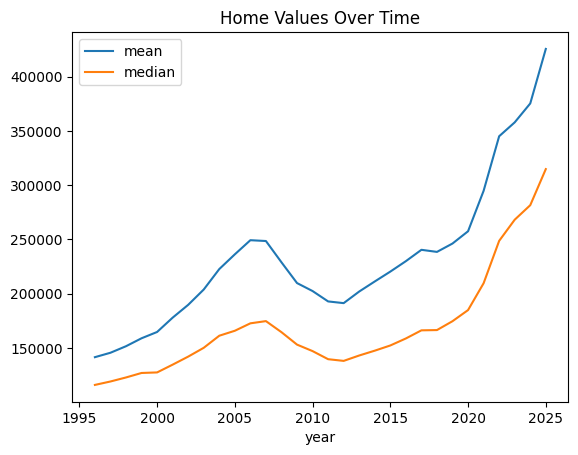

In [ ]:
#quick graph of mean, median over time
summary_yr.plot(x='year', y=['mean', 'median'])
plt.title('Home Values Over Time')
plt.show()